In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import scipy.io as sio
import numpy as np

In [7]:
data = sio.loadmat('/content/drive/My Drive/Colab Notebooks/분석/sentimentdataset.mat')

In [8]:
bagofword = data['bagofword'] #(198, 29717) 
sentiment = data['sentiment'] #(198, 1)
sentiment = sentiment.astype(int)
words = data['word'] #(29717, 1)

In [9]:
data = dict()
data['bagofword'] = bagofword #inputs
data['sentiment'] = sentiment #output

In [12]:
#cell = 10
#for M in range(1, cell + 1)
M = 1
N = M * 10 #training 0 ~ N, testing N ~ 198

In [14]:
numWord = 100

h = 0.5
threshold = 0.1

In [15]:
#N마다 5 번 반복 (theta, 5), update 500
itr = 500
replication = 5

In [23]:
#1번째 replication

sample = np.random.permutation(np.arange(198))
numFeatures = numWord + 1
Y = sentiment[sample]
X = np.ones((np.size(sample), numFeatures))

x_temp = bagofword[sample][:, range(numWord)]
X[:, range(1, numFeatures) ] = x_temp

In [39]:
theta = np.ones((numFeatures,1)) #초기값
#for itr in range(iteration):
iteration = 500
for itr in range(iteration):
  newTheta = np.zeros((numFeatures, 1))
  for i in range(numFeatures): #theta i 마다
      temp = 0
      for j in range(N): # N trainingset size 마다
          Xtheta = np.dot(X[j, :], theta)[0]
          temp += X[j, i] * ( Y[j][0] - np.exp(Xtheta) / (1 + np.exp(Xtheta)))
      newTheta[i] = theta[i] + h * temp
  diff = np.sum(np.abs(theta - newTheta))
  if diff / (np.sum(np.abs(theta))) < threshold:
    break
  theta = newTheta

In [44]:
trainingAccuracy = np.zeros((replication, 10)); #(5, 10) (replication, N)
testingAccuracy = np.zeros((replication, 10));
avgTraining = np.zeros((10, 1));
stdTraining = np.zeros((10, 1));
avgTesting = np.zeros((10, 1));
stdTesting = np.zeros((10, 1));

In [40]:
#결과 P(Y | X) = np.exp(X * theta) / (1 + np.exp(X*theta))
estSentiment = np.zeros((198, 1))
for i in range(198):
  Xtheta = np.dot(X[i, :] , theta)[0]
  if 1 / (1 + np.exp(Xtheta)) > 0.5 :
    estSentiment[i] = 0
  else:
    estSentiment[i] = 1

In [45]:
#training accuracy  - M => 1 일 때, rep = 1일때 
rep = 0
cntCorrect = 0
for i in range(N):
  if estSentiment[i] == Y[i]:
    cntCorrect += 1
trainingAccuracy[rep, M - 1] = cntCorrect / float(N)

In [46]:
trainingAccuracy

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [52]:
cell = 10

In [65]:
#M = 1
for M in range(1, cell+1):
  N  = 10 * M

  for rep in range(replication):
      sample = np.random.permutation(np.arange(198))
      numFeatures = numWord + 1
      Y = sentiment[sample]
      X = np.ones((np.size(sample), numFeatures))

      x_temp = bagofword[sample][:, range(numWord)]
      X[:, range(1, numFeatures) ] = x_temp
      theta = np.ones((numFeatures,1)) #초기값

      #for itr in range(iteration):
      iteration = 500
      for itr in range(iteration):
        newTheta = np.zeros((numFeatures, 1))
        for i in range(numFeatures): #theta i 마다
            temp = 0
            for j in range(N): # N trainingset size 마다
                Xtheta = np.dot(X[j, :], theta)[0]
                temp += X[j, i] * ( Y[j][0] - np.exp(Xtheta) / (1 + np.exp(Xtheta)))
            newTheta[i] = theta[i] + h * temp
        diff = np.sum(np.abs(theta - newTheta))
        if diff / (np.sum(np.abs(theta))) < threshold:
          break
        theta = newTheta
      estSentiment = np.zeros((198, 1))
      for i in range(198):
        Xtheta = np.dot(X[i, :] , theta)[0]
        if 1 / (1 + np.exp(Xtheta)) > 0.5 :
          estSentiment[i] = 0
        else:
          estSentiment[i] = 1
      #rep = 0
      cntCorrect = 0
      for i in range(N):
        if estSentiment[i] == Y[i]:
          cntCorrect += 1
      trainingAccuracy[rep, M - 1] = cntCorrect / float(N)

In [66]:
trainingAccuracy

array([[0.7       , 0.75      , 0.8       , 0.675     , 0.84      ,
        0.81666667, 0.7       , 0.7375    , 0.78888889, 0.66      ],
       [0.5       , 0.7       , 0.8       , 0.8       , 0.84      ,
        0.8       , 0.75714286, 0.725     , 0.78888889, 0.73      ],
       [0.7       , 0.65      , 0.83333333, 0.85      , 0.78      ,
        0.73333333, 0.7       , 0.7       , 0.7       , 0.75      ],
       [0.7       , 0.75      , 0.83333333, 0.725     , 0.74      ,
        0.75      , 0.75714286, 0.7       , 0.8       , 0.7       ],
       [0.3       , 0.8       , 0.83333333, 0.775     , 0.76      ,
        0.75      , 0.72857143, 0.6875    , 0.71111111, 0.76      ]])

In [67]:
for M in range(1, cell+1):
  avgTraining[M-1] = np.mean(trainingAccuracy[:,M-1]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


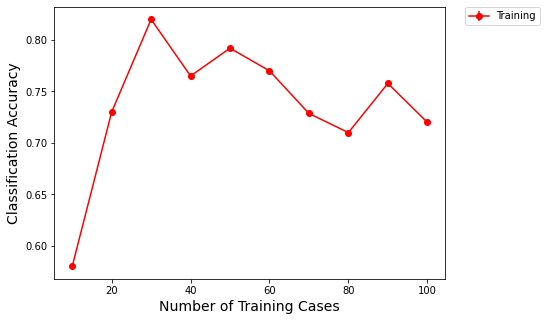

In [68]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (7,5));
plt.errorbar(np.dot(10,range(1,cell+1)), avgTraining, yerr = stdTraining/np.sqrt(replication), fmt='-o', color='r', label="Training");
#plt.errorbar(np.dot(10,range(1,cell+1)), avgTesting, yerr = stdTesting/np.sqrt(replication), fmt='-o', label="Testing");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of Training Cases', fontsize = 14)
plt.ylabel('Classification Accuracy', fontsize = 14)

plt.show();

In [100]:
numWord = 100 #모델을 만들때 사용하는 단어의 개수 

h = 0.5 # learning rate
threshold = 0.1 # 업데이트 되는 값이 작으면

In [101]:
import numpy as np

In [102]:
trainingAccuracy = np.zeros((replication, 10));
trainingAccuracy

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [103]:
testingAccuracy = np.zeros((replication, 10));

In [104]:
replication = 5 

In [ ]:
cell = 10
for M in range(1 , cell + 10):

In [88]:
M = 1
N = M * 10 # 198 개; training N, test 198 - N
for rep in range(replication):
  sample = np.random.permutation(np.arange(198)); #198개 문서를 random shuffle
        
  numFeatures = numWord + 1; # theta의 상수항을 위해 1을 더해줌
  X = np.ones((np.size(sample),numFeatures));
  tempMat = bagofword[sample];
  tempMat = tempMat[:,range(numWord)];
  X[:,range(1,numFeatures)] = tempMat; # 사용하는 단어만 input data X에 대입함
  Y = sentiment[sample];
  
  theta = np.ones((numFeatures,1)); #임의로 설정된 시작위치
  itr = 500; # theta 업데이트 횟수
  
  cntItr = 0;
  for k in range(itr):
      thetanew = np.zeros((numFeatures,1));
      for i in range(numFeatures): # 각 i번째 단어에 대해 아래의 과정을 실행
          temp = 0;
          for j in range(N): # training set중 j번째(shuffle된 문서 기준) 문서에 대해 아래의 과정을 실행
              Xtheta = 0;
              Xtheta = np.dot(X[j,:], theta)[0]; # Xtheta = X_i * theta_t
              temp = temp + X[j,i] * ( Y[j][0] - np.exp(Xtheta) / (1 + np.exp(Xtheta))); # ... eq(2)
          temp = temp * h;
          thetanew[i] = theta[i] + temp; # 업데이트할 theta
      diff = np.sum(np.abs(theta-thetanew));
      if diff/(np.sum(np.abs(theta))) < threshold: #업데이트할 theta가 threshold보다 작으면 업데이트 하지 않음
          break;
      cntItr = cntItr + 1; # 업데이트 횟수
      theta = thetanew;
    # probsSntiment : 각 문서가 positive 또는 negative sentiment를 가질 확률
  probsSentiment = np.zeros((198,2));
  for i in range(198):
      Xtheta = np.dot(X[i,:], theta)[0];
      probsSentiment[i,0] = 1 / (1 + np.exp(Xtheta)); # p(y|x)를 로지스틱 함수 형태로 가정하였음 & ... eq(1)
      probsSentiment[i,1] = 1 - 1 / (1 + np.exp(Xtheta)); #p(y|x)를 이항분포로 가정하였음

  # MCLE를 통하여 각 문서의 sentiment를 추정함
  estSentiment = np.zeros((198,1));
  for i in range(198):
      if probsSentiment[i,0] > probsSentiment[i,1]:
          estSentiment[i] = 0;
      else:
          estSentiment[i] = 1;

  # training accuracy를 측정함
  cntCorrect = 0;
  for i in range(N): # 모든 training set에 대하여 추정값과 실제값을 비교함
      if estSentiment[i] == Y[i]:
          cntCorrect = cntCorrect + 1;
  trainingAccuracy[rep,M-1] = cntCorrect / float(N); #반복횟수에 따른 training set 크기별 training accuracy를 저장함

  cntCorrect = 0;
  for i in range(N,N+numTesting): # 모든 testing set에 대하여 추정값과 실제값을 비교함
      if estSentiment[i] == Y[i]:
          cntCorrect = cntCorrect + 1;
  testingAccuracy[rep,M-1] = cntCorrect / float(numTesting); #반복횟수에 따른 training set 크기별 testing accuracy를 저장함


In [89]:
trainingAccuracy

array([[0.7       , 0.9       , 0.76666667, 0.775     , 0.76      ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.8       , 0.85      , 0.63333333, 0.825     , 0.76      ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.7       , 0.75      , 0.66666667, 0.85      , 0.72      ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9       , 0.8       , 0.73333333, 0.825     , 0.78      ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.75      , 0.8       , 0.775     , 0.76      ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
avgTraining = np.zeros((10, 1));

In [94]:
avgTraining[3-1] = np.mean(trainingAccuracy[:,3-1])

In [95]:
avgTraining

array([[0.72],
       [0.81],
       [0.72],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ]])

In [ ]:
avgTesting = np.zeros((cell, 1));

In [ ]:
avgTesting[M-1] = np.mean(testingAccuracy[:,M-1]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

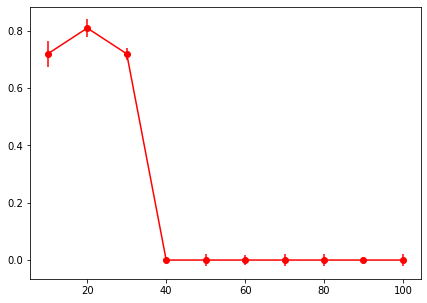

In [96]:
plt.figure(1, figsize = (7,5));
plt.errorbar(np.dot(10,range(1,cell+1)), avgTraining, yerr = stdTraining/np.sqrt(replication), fmt='-o', color='r', label="Training")

In [64]:
cell = 10; # Training set의 크기를 변화시키는 횟수
replication = 5; # 반복횟수
numTesting = 50; # Testing set의 크기
numWord = 100; # 데이터의 크기 - 모델을 만들 때 사용하는 단어의 개수

trainingAccuracy = np.zeros((replication, 10));
testingAccuracy = np.zeros((replication, 10));
avgTraining = np.zeros((cell, 1));
stdTraining = np.zeros((cell, 1));
avgTesting = np.zeros((cell, 1));
stdTesting = np.zeros((cell, 1));

# Gradient Ascent의 상수 
h = 0.5; # theta가 업데이트 되는 속력
threshold = 0.1; # 업데이트 되는 값이 작은 경우, theta가 local maximum에 수렴할 수 있으므로 threshold를 설정함

for M in range(1,cell+1): # Training set의 변화 횟수만큼 반복
    N = M*10; # N : Training set의 갯수
    for rep in range(replication):
        sample = np.random.permutation(np.arange(198)); #198개 문서를 random shuffle
        
        numFeatures = numWord + 1; # theta의 상수항을 위해 1을 더해줌
        X = np.ones((np.size(sample),numFeatures));
        tempMat = bagofword[sample];
        tempMat = tempMat[:,range(numWord)];
        X[:,range(1,numFeatures)] = tempMat; # 사용하는 단어만 input data X에 대입함
        Y = sentiment[sample];
        
        theta = np.ones((numFeatures,1)); #임의로 설정된 시작위치
        itr = 500; # theta 업데이트 횟수
        
        cntItr = 0;
        for k in range(itr):
            thetanew = np.zeros((numFeatures,1));
            for i in range(numFeatures): # 각 i번째 단어에 대해 아래의 과정을 실행
                temp = 0;
                for j in range(N): # training set중 j번째(shuffle된 문서 기준) 문서에 대해 아래의 과정을 실행
                    Xtheta = 0;
                    Xtheta = np.dot(X[j,:], theta)[0]; # Xtheta = X_i * theta_t
                    temp = temp + X[j,i] * ( Y[j][0] - np.exp(Xtheta) / (1 + np.exp(Xtheta))); # ... eq(2)
                temp = temp * h;
                thetanew[i] = theta[i] + temp; # 업데이트할 theta
            diff = np.sum(np.abs(theta-thetanew));
            if diff/(np.sum(np.abs(theta))) < threshold: #업데이트할 theta가 threshold보다 작으면 업데이트 하지 않음
                break;
            cntItr = cntItr + 1; # 업데이트 횟수
            theta = thetanew;
        
        # probsSntiment : 각 문서가 positive 또는 negative sentiment를 가질 확률
        probsSentiment = np.zeros((198,2));
        for i in range(198):
            Xtheta = np.dot(X[i,:], theta)[0];
            probsSentiment[i,0] = 1 / (1 + np.exp(Xtheta)); # p(y|x)를 로지스틱 함수 형태로 가정하였음 & ... eq(1)
            probsSentiment[i,1] = 1 - 1 / (1 + np.exp(Xtheta)); #p(y|x)를 이항분포로 가정하였음
        
        # MCLE를 통하여 각 문서의 sentiment를 추정함
        estSentiment = np.zeros((198,1));
        for i in range(198):
            if probsSentiment[i,0] > probsSentiment[i,1]:
                estSentiment[i] = 0;
            else:
                estSentiment[i] = 1;
        
        # training accuracy를 측정함
        cntCorrect = 0;
        for i in range(N): # 모든 training set에 대하여 추정값과 실제값을 비교함
            if estSentiment[i] == Y[i]:
                cntCorrect = cntCorrect + 1;
        trainingAccuracy[rep,M-1] = cntCorrect / float(N); #반복횟수에 따른 training set 크기별 training accuracy를 저장함
        
        # testing accuracy를 측정함
        cntCorrect = 0;
        for i in range(N,N+numTesting): # 모든 testing set에 대하여 추정값과 실제값을 비교함
            if estSentiment[i] == Y[i]:
                cntCorrect = cntCorrect + 1;
        testingAccuracy[rep,M-1] = cntCorrect / float(numTesting); #반복횟수에 따른 training set 크기별 testing accuracy를 저장함
    
    # replication된 정확도의 평균값 계산
    avgTraining[M-1] = np.mean(trainingAccuracy[:,M-1]);
    avgTesting[M-1] = np.mean(testingAccuracy[:,M-1]);
    
    # replication된 정확도의 표준편차 계산
    stdTraining[M-1] = np.std(trainingAccuracy[:,M-1]);
    stdTesting[M-1] = np.std(testingAccuracy[:, M-1]);

In [65]:
trainingAccuracy

array([[0.8       , 0.9       , 0.8       , 0.8       , 0.7       ,
        0.71666667, 0.67142857, 0.725     , 0.74444444, 0.76      ],
       [0.6       , 0.75      , 0.7       , 0.825     , 0.72      ,
        0.73333333, 0.78571429, 0.7125    , 0.76666667, 0.74      ],
       [0.7       , 0.9       , 0.83333333, 0.75      , 0.84      ,
        0.73333333, 0.78571429, 0.8       , 0.7       , 0.65      ],
       [0.9       , 0.8       , 0.76666667, 0.8       , 0.72      ,
        0.78333333, 0.74285714, 0.675     , 0.72222222, 0.76      ],
       [0.7       , 0.75      , 0.8       , 0.775     , 0.76      ,
        0.81666667, 0.68571429, 0.675     , 0.75555556, 0.67      ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


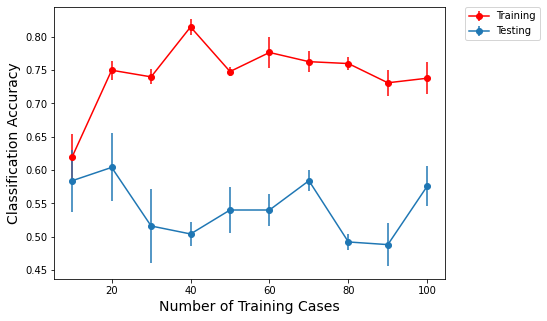

In [41]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (7,5));
plt.errorbar(np.dot(10,range(1,cell+1)), avgTraining, yerr = stdTraining/np.sqrt(replication), fmt='-o', color='r', label="Training");
plt.errorbar(np.dot(10,range(1,cell+1)), avgTesting, yerr = stdTesting/np.sqrt(replication), fmt='-o', label="Testing");

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of Training Cases', fontsize = 14)
plt.ylabel('Classification Accuracy', fontsize = 14)

plt.show();